In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from astropy.io import fits
from scipy import ndimage
from simulations.pln_iefc_sims import zernikes, calibration_modes
plt.rcParams.update({'font.size': 14})


(160, 40)


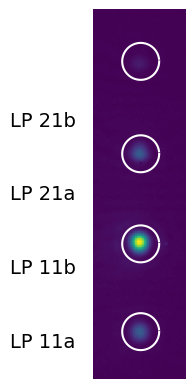

In [2]:
#example snapshot

dark = fits.getdata('data/cred2_dark_tint0p8.fits')
snap = fits.getdata('data/test_0.797079_avgs5.fits')

crop_idx_x_1 = 285-1
crop_idx_x_2 = 325-1
crop_idx_y_1 = 200-1
crop_idx_y_2 = 360-1

snap = snap[crop_idx_y_1:crop_idx_y_2,crop_idx_x_1:crop_idx_x_2]
print(snap.shape)

snap_dsub = snap-dark

def xy(r,phi,xc,yc):
  return r*np.cos(phi)+xc, r*np.sin(phi)+yc

plt.figure()
plt.imshow(snap_dsub)
plt.axis('off')
plt.annotate('LP 11a',(-60,23),xycoords='axes points',fontsize=14)
plt.annotate('LP 11b',(-60,76),xycoords='axes points',fontsize=14)
plt.annotate('LP 21a',(-60,129),xycoords='axes points',fontsize=14)
plt.annotate('LP 21b',(-60,182),xycoords='axes points',fontsize=14)

phis=np.arange(0,6.15,0.01)
r = 8.
plt.plot(*xy(r,phis,20,139), c='w',ls='-' )
plt.plot(*xy(r,phis,20,101), c='w',ls='-' )
plt.plot(*xy(r,phis,20,62), c='w',ls='-' )
plt.plot(*xy(r,phis,20,22), c='w',ls='-' )

(-0.5, 11.5, 11.5, -0.5)

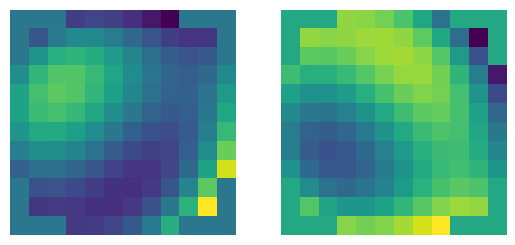

In [3]:
probe_mode_1 = (zernikes[4]+zernikes[5]+zernikes[6]+zernikes[7])/np.sqrt(4)
probe_mode_2 = (zernikes[4]-zernikes[5]+zernikes[6]-zernikes[7])/np.sqrt(4)

probe_modes = np.array([probe_mode_1,probe_mode_2])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(probe_mode_1)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(probe_mode_2)
plt.axis('off')

NameError: name 'calibration_modes' is not defined

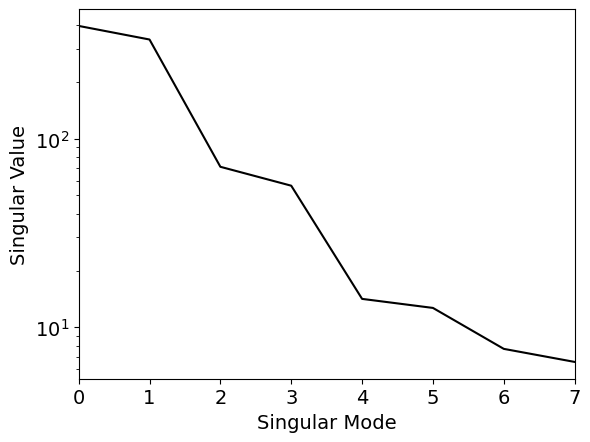

<Figure size 800x400 with 0 Axes>

In [5]:
#plot response matrix SVD modes

resmatrix1 = np.load('data/all_ports_meas/run1_tint0p2/resmatrix.npy')

U1, S1, Vh1 = np.linalg.svd(resmatrix1, full_matrices=True)

plt.figure()
plt.semilogy(S1,color='black')
plt.xlabel('Singular Mode')
plt.ylabel('Singular Value')
plt.xlim([0,7])

plt.figure(figsize=[8,4])
sensed_modes = []
for n in range(8):
    sensed_mode = np.sum(np.expand_dims(Vh1[n],(1,2))*calibration_modes,axis=0)
    plt.subplot(2,4,n+1)
    plt.imshow(sensed_mode)
    plt.axis('off')

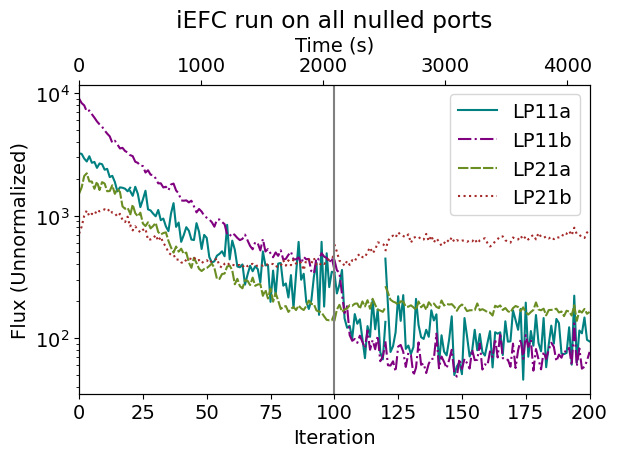

In [4]:
#all 4 ports

k_0 = range(21)
dir0 = 'data/all_ports_meas/run1_tint0p2/'
meas_0 = np.load(dir0+'meas_0.npy')*1e6

k_1 = range(20,101)
dir1 = 'data/all_ports_meas/run1_tint0p2/'
meas_1 = np.load(dir1+'meas_1.npy')*1e6

k_2 = range(100,121)
dir2 = 'data/all_ports_meas/run2_tint6p0_probediv10/'
meas_2 = np.load(dir2+'meas_0.npy')*1e6*0.2/6.0

k_3 = range(120,201)
dir3 = 'data/all_ports_meas/run2_tint6p0_probediv10/'
meas_3 = np.load(dir3+'meas_1.npy')*1e6*0.2/6.0

port_names = ['LP11a', 'LP11b', 'LP21a','LP21b']

linestyles = ['-','-.',(0,(5,1)),':']
linecolors = ['teal','purple','olivedrab','brown']

plt.figure()
plt.subplot()
for n in range(4):
    plt.semilogy(k_0,meas_0[:,n],label=port_names[n],linestyle=linestyles[n],color=linecolors[n])
    plt.semilogy(k_1,meas_1[:,n],linestyle=linestyles[n],color=linecolors[n])
    plt.semilogy(k_2,meas_2[:,n],linestyle=linestyles[n],color=linecolors[n])
    plt.semilogy(k_3,meas_3[:,n],linestyle=linestyles[n],color=linecolors[n])
plt.xlim([0,200])
plt.axvline(100,color='gray')
plt.xlabel('Iteration')
plt.ylabel('Flux (Unnormalized)')
plt.legend(loc='upper right',fontsize=14)
ax1 = plt.gca()
ax2 = ax1.twiny()
approx_timestamps = np.arange(0,20.914562940597534*201,20.914562940597534) #dummy line
ax2.plot(approx_timestamps,np.ones(approx_timestamps.shape)*1e3,linewidth=0)
plt.xlim([0,20.914562940597534*200])
plt.xlabel('Time (s)')
plt.title('iEFC run on all nulled ports')
plt.tight_layout()

0.03347416003902622


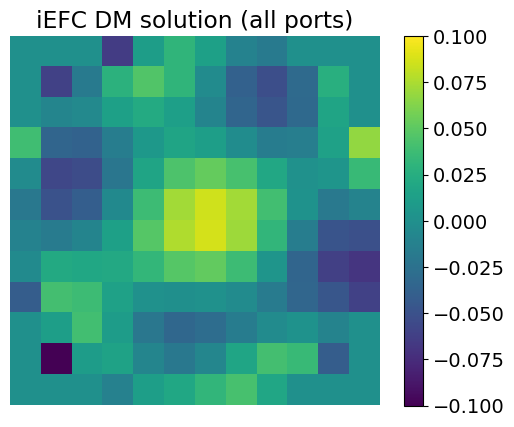

In [5]:
#plot DM map change from iEFC
dm_before = np.load('data/flat_map.npy')
dm_after_allp = np.load('data/all_ports_meas/run2_tint6p0_probediv10/dm_hist_1.npy')[-1]
dm_diff_allp = dm_after_allp-dm_before

plt.figure()
plt.imshow(dm_diff_allp,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.axis('off')
plt.title('iEFC DM solution (all ports)')

print(np.sqrt(np.mean(np.square(dm_diff_allp))))

(4, 20000)
20.914562940597534


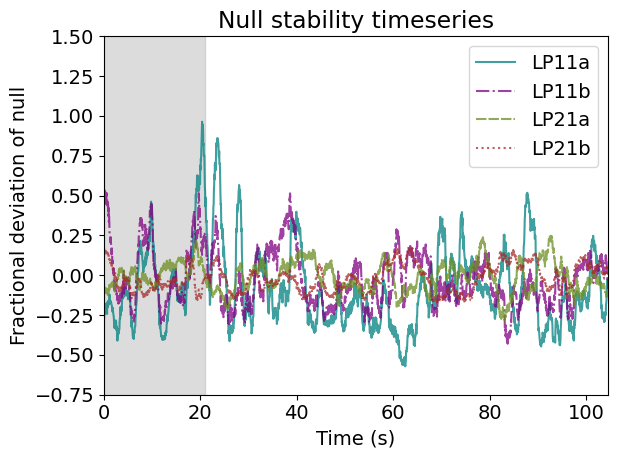

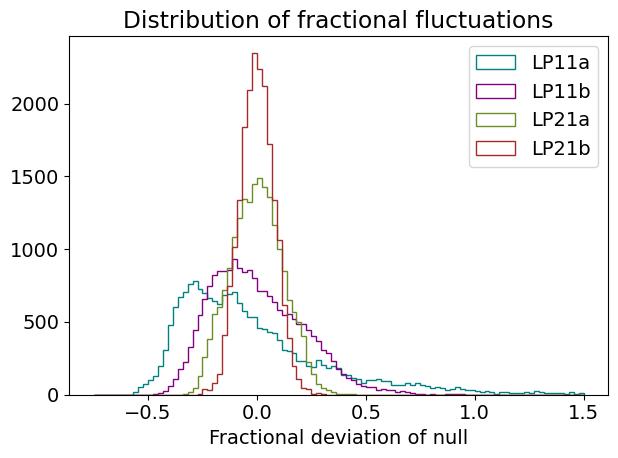

In [6]:
#testbed instability timeseries

timestamps = np.load('data/all_ports_meas/run2_tint6p0_probediv10/stability_test_tint6p0_timestamps.npy')
timestamps = timestamps-timestamps[0]
samples = np.load('data/all_ports_meas/run2_tint6p0_probediv10/stability_test_tint6p0_samples.npy')

flucts = []
frac_flucts = []
for n in range(4):
    fluct = samples[:,n]-np.mean(samples[:,n])
    flucts.append(fluct)
    frac_flucts.append(fluct/np.mean(samples[:,n]))
flucts = np.array(flucts)
frac_flucts = np.array(frac_flucts)
print(frac_flucts.shape)

plt.figure()
for n in range(4):
    plt.plot(timestamps,frac_flucts[n],color=linecolors[n],label=port_names[n],linestyle=linestyles[n],alpha=0.75)
plt.xlim([0,timestamps[400*5]])
plt.ylim([-0.75,1.5])
plt.axvspan(0, timestamps[399],color='darkgray',alpha=0.4)
plt.xlabel('Time (s)')
plt.ylabel('Fractional deviation of null')
plt.legend()
plt.title('Null stability timeseries')
plt.tight_layout()

hist_bins = np.linspace(-.75,1.5,100)
plt.figure()
for n in range(4):
    plt.hist(frac_flucts[n],bins=hist_bins,histtype='step',color=linecolors[n],label=port_names[n])
plt.legend()
plt.xlabel('Fractional deviation of null')
plt.title('Distribution of fractional fluctuations')
plt.tight_layout()

print(timestamps[400]-timestamps[0])

0.39425717214950506
0.35812070009897773
0.13083848468967044
0.11245857496890646
0.2459609837352298
0.22408734743868786
0.10802911206078691
0.07146328413037949


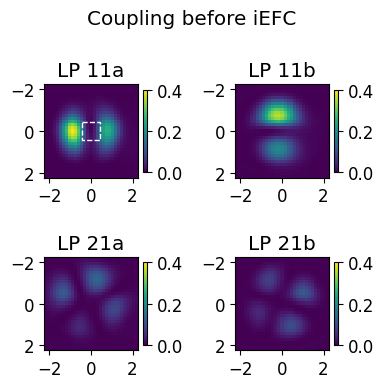

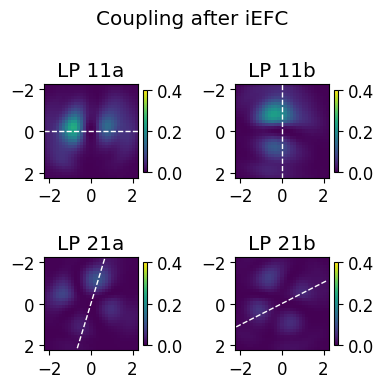

In [7]:
#plot coupling maps
plt.rcParams.update({'font.size': 12})
scan_dir_broad = 'data/all_ports_scans/pd_scans_wide/'

lp21a_rotangle = -73
lp21b_rotangle = -73+46

lp11a_pre = fits.getdata(scan_dir_broad+'lp11a_pre_iEFC_30x30_NORMREDU.fits')
lp11b_pre = fits.getdata(scan_dir_broad+'lp11b_pre_iEFC_30x30_NORMREDU.fits')
lp21a_pre = fits.getdata(scan_dir_broad+'lp21a_pre_iEFC_30x30_NORMREDU.fits')
lp21b_pre = fits.getdata(scan_dir_broad+'lp21b_pre_iEFC_30x30_NORMREDU.fits')

print(np.max(lp11a_pre))
print(np.max(lp11b_pre))
print(np.max(lp21a_pre))
print(np.max(lp21b_pre))

maxes_pre = np.array([np.max(lp11a_pre),np.max(lp11b_pre),np.max(lp21a_pre),np.max(lp21b_pre)])

lp11a = fits.getdata(scan_dir_broad+'lp11a_post_iEFC_30x30_NORMREDU.fits')
lp11b = fits.getdata(scan_dir_broad+'lp11b_post_iEFC_30x30_NORMREDU.fits')
lp21a = fits.getdata(scan_dir_broad+'lp21a_post_iEFC_30x30_NORMREDU.fits')
lp21b = fits.getdata(scan_dir_broad+'lp21b_post_iEFC_30x30_NORMREDU.fits')

print(np.max(lp11a))
print(np.max(lp11b))
print(np.max(lp21a))
print(np.max(lp21b))

maxes_post = np.array([np.max(lp11a),np.max(lp11b),np.max(lp21a),np.max(lp21b)])

vmax = 0.4

x_min = -2.24666666667
x_max = 2.24666666667
map_extent = [x_min,x_max,x_max,x_min]
fine_map_extent = np.array(map_extent)/5
plt.figure(figsize=[4,4])
plt.subplot(2,2,1)
plt.imshow(lp11a_pre,vmin=0,vmax=vmax, extent=map_extent)
plt.colorbar(fraction=0.04)
plt.title('LP 11a')

rect = patches.Rectangle((x_min/5, x_min/5), x_max/5*2, x_max/5*2, linewidth=1, edgecolor='white', facecolor='none', linestyle='dashed')
ax = plt.gca()
ax.add_patch(rect)

plt.subplot(2,2,2)
plt.imshow(lp11b_pre,vmin=0,vmax=vmax, extent=map_extent)
plt.colorbar(fraction=0.04)
plt.title('LP 11b')
plt.subplot(2,2,3)
plt.imshow(lp21a_pre,vmin=0,vmax=vmax, extent=map_extent)
plt.colorbar(fraction=0.04)
plt.title('LP 21a')
plt.subplot(2,2,4)
plt.imshow(lp21b_pre,vmin=0,vmax=vmax, extent=map_extent)
plt.colorbar(fraction=0.04)
plt.title('LP 21b')
plt.suptitle('Coupling before iEFC')
plt.tight_layout()

plt.figure(figsize=[4,4])
plt.subplot(2,2,1)
plt.imshow(lp11a,vmin=0,vmax=vmax, extent=map_extent)
plt.colorbar(fraction=0.04)
plt.hlines(0,x_min,x_max,colors=['white'],linestyle='--',linewidth=1)
plt.title('LP 11a')
plt.subplot(2,2,2)
plt.imshow(lp11b,vmin=0,vmax=vmax, extent=map_extent)
plt.colorbar(fraction=0.04)
plt.axvline(0, color='white', linestyle='--',linewidth=1)
plt.title('LP 11b')
plt.subplot(2,2,3)
plt.imshow(lp21a,vmin=0,vmax=vmax, extent=map_extent)
plt.colorbar(fraction=0.04)
plt.plot([x_min*np.cos(lp21a_rotangle/180*np.pi),x_max*np.cos(lp21a_rotangle/180*np.pi)],[x_min*np.sin(lp21a_rotangle/180*np.pi),x_max*np.sin(lp21a_rotangle/180*np.pi)],color='white',linestyle='--',linewidth=1)
plt.title('LP 21a')
plt.subplot(2,2,4)
plt.imshow(lp21b,vmin=0,vmax=vmax, extent=map_extent)
plt.colorbar(fraction=0.04)
plt.plot([x_min*1.1*np.cos(lp21b_rotangle/180*np.pi),x_max*1.1*np.cos(lp21b_rotangle/180*np.pi)],[x_min*1.1*np.sin(lp21b_rotangle/180*np.pi),x_max*1.1*np.sin(lp21b_rotangle/180*np.pi)],color='white',linestyle='--',linewidth=1)
plt.title('LP 21b')
plt.suptitle('Coupling after iEFC')
plt.tight_layout()


In [8]:
print(x_min*np.cos(lp21a_rotangle/180*np.pi))
print(x_min*np.sin(lp21a_rotangle/180*np.pi))

-0.6568617632780565
2.1484980184001405


(16, 14)
(15, 16)


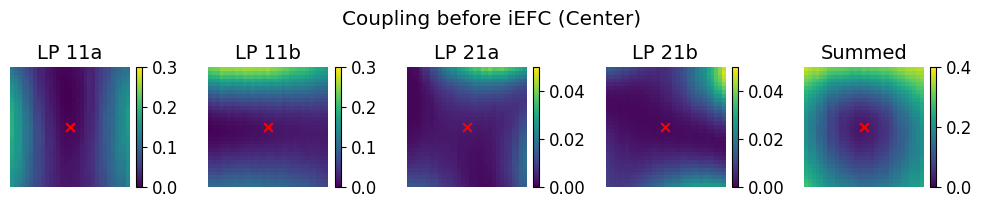

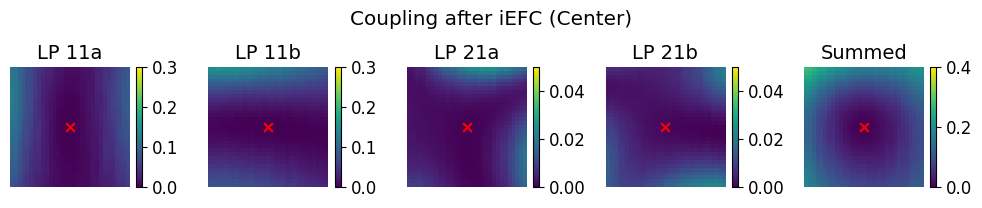

In [9]:
#plot fine maps

scan_dir_fine = 'data/all_ports_scans/pd_scans_fine/'

lp11a_fine_pre = fits.getdata(scan_dir_fine+'lp11a_pre_iEFC_30x30_NORMREDU.fits')
lp11b_fine_pre = fits.getdata(scan_dir_fine+'lp11b_pre_iEFC_30x30_NORMREDU.fits')
lp21a_fine_pre = fits.getdata(scan_dir_fine+'lp21a_pre_iEFC_30x30_NORMREDU.fits')
lp21b_fine_pre = fits.getdata(scan_dir_fine+'lp21b_pre_iEFC_30x30_NORMREDU.fits')
pre_summed_map = lp11a_fine_pre+lp11b_fine_pre+lp21a_fine_pre+lp21b_fine_pre
print(np.unravel_index(np.argmin(pre_summed_map),pre_summed_map.shape))

lp11a_fine = fits.getdata(scan_dir_fine+'lp11a_post_iEFC_30x30_NORMREDU.fits')
lp11b_fine = fits.getdata(scan_dir_fine+'lp11b_post_iEFC_30x30_NORMREDU.fits')
lp21a_fine = fits.getdata(scan_dir_fine+'lp21a_post_iEFC_30x30_NORMREDU.fits')
lp21b_fine = fits.getdata(scan_dir_fine+'lp21b_post_iEFC_30x30_NORMREDU.fits')
post_summed_map = lp11a_fine+lp11b_fine+lp21a_fine+lp21b_fine
print(np.unravel_index(np.argmin(post_summed_map),post_summed_map.shape))

vmax_fine_11 = 0.3
vmax_fine_21 = 0.05
vmax_fine_sum = 0.4

plt.figure(figsize=[10,2])
plt.subplot(1,5,1)
plt.imshow(lp11a_fine_pre,vmin=0,vmax=vmax_fine_11,extent=fine_map_extent)
plt.xticks(rotation=90)
plt.axis('off')
plt.colorbar(fraction=0.05)
plt.scatter(0,0,marker='x',s=40,c='red')
plt.title('LP 11a',fontsize=14)
plt.subplot(1,5,2)
plt.imshow(lp11b_fine_pre,vmin=0,vmax=vmax_fine_11,extent=fine_map_extent)
plt.xticks(rotation=90)
plt.axis('off')
plt.colorbar(fraction=0.05)
plt.scatter(0,0,marker='x',s=40,c='red')
plt.title('LP 11b',fontsize=14)
plt.subplot(1,5,3)
plt.imshow(lp21a_fine_pre,vmin=0,vmax=vmax_fine_21,extent=fine_map_extent)
plt.xticks(rotation=90)
plt.axis('off')
plt.colorbar(fraction=0.05)
plt.scatter(0,0,marker='x',s=40,c='red')
plt.title('LP 21a',fontsize=14)
plt.subplot(1,5,4)
plt.imshow(lp21b_fine_pre,vmin=0,vmax=vmax_fine_21,extent=fine_map_extent)
plt.xticks(rotation=90)
plt.axis('off')
plt.colorbar(fraction=0.05)
plt.scatter(0,0,marker='x',s=40,c='red')
plt.title('LP 21b',fontsize=14)
plt.subplot(1,5,5)
plt.imshow(pre_summed_map,vmin=0,vmax=vmax_fine_sum,extent=fine_map_extent)
plt.xticks(rotation=90)
plt.axis('off')
plt.colorbar(fraction=0.05)
plt.scatter(0,0,marker='x',s=40,c='red')
plt.title('Summed',fontsize=14)
plt.suptitle('Coupling before iEFC (Center)')
plt.tight_layout()

plt.figure(figsize=[10,2])
plt.subplot(1,5,1)
plt.imshow(lp11a_fine,vmin=0,vmax=vmax_fine_11,extent=fine_map_extent)
plt.xticks(rotation=90)
plt.axis('off')
plt.colorbar(fraction=0.05)
plt.scatter(0,0,marker='x',s=40,c='red')
plt.title('LP 11a',fontsize=14)
plt.subplot(1,5,2)
plt.imshow(lp11b_fine,vmin=0,vmax=vmax_fine_11,extent=fine_map_extent)
plt.xticks(rotation=90)
plt.axis('off')
plt.colorbar(fraction=0.05)
plt.scatter(0,0,marker='x',s=40,c='red')
plt.title('LP 11b',fontsize=14)
plt.subplot(1,5,3)
plt.imshow(lp21a_fine,vmin=0,vmax=vmax_fine_21,extent=fine_map_extent)
plt.xticks(rotation=90)
plt.axis('off')
plt.colorbar(fraction=0.05)
plt.scatter(0,0,marker='x',s=40,c='red')
plt.title('LP 21a',fontsize=14)
plt.subplot(1,5,4)
plt.imshow(lp21b_fine,vmin=0,vmax=vmax_fine_21,extent=fine_map_extent)
plt.xticks(rotation=90)
plt.axis('off')
plt.colorbar(fraction=0.05)
plt.scatter(0,0,marker='x',s=40,c='red')
plt.title('LP 21b',fontsize=14)
plt.subplot(1,5,5)
plt.imshow(post_summed_map,vmin=0,vmax=vmax_fine_sum,extent=fine_map_extent)
plt.xticks(rotation=90)
plt.axis('off')
plt.colorbar(fraction=0.05)
plt.scatter(0,0,marker='x',s=40,c='red')
plt.title('Summed',fontsize=14)
plt.suptitle('Coupling after iEFC (Center)')
plt.tight_layout()

[0.00533821 0.01654329 0.00370354 0.001305  ]
[5.79592322e-05 8.10124960e-05 2.35306369e-04 1.15370881e-03]
[0.01353992 0.04619473 0.02830622 0.01160423]
[0.00023564 0.00036152 0.00217818 0.01614408]


/var/folders/fh/y35_z7xx69qcg_1dsr5v411w0000gn/T/ipykernel_96082/1240156763.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels)
/var/folders/fh/y35_z7xx69qcg_1dsr5v411w0000gn/T/ipykernel_96082/1240156763.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels)


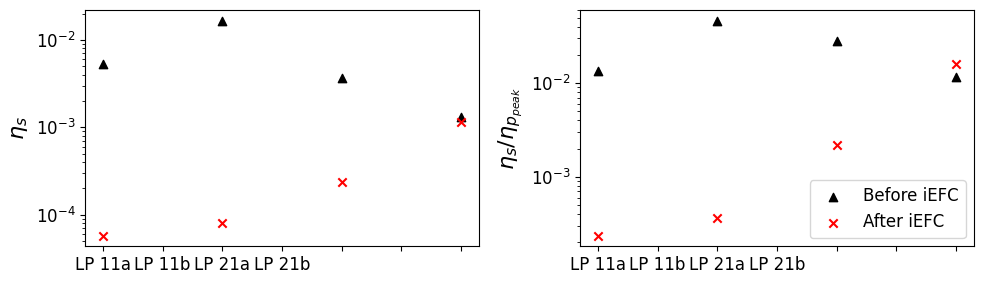

In [10]:
eta_s_pre = np.array([lp11a_fine_pre[15,15],lp11b_fine_pre[15,15],lp21a_fine_pre[15,15],lp21b_fine_pre[15,15]])
print(eta_s_pre)
eta_s_post = np.array([lp11a_fine[15,15],lp11b_fine[15,15],lp21a_fine[15,15],lp21b_fine[15,15]])
print(eta_s_post)

print(eta_s_pre/maxes_pre)
print(eta_s_post/maxes_post)

xlabels=['','LP 11a', 'LP 11b', 'LP 21a', 'LP 21b']

plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(range(4),eta_s_pre,label='Before iEFC',marker='^',color='black')
plt.scatter(range(4),eta_s_post,label='After iEFC',marker='x',color='red')
ax=plt.gca()
ax.set_yscale('log')
ax.set_xticklabels(xlabels)
plt.ylabel(r'$\eta_s$',fontsize=16)
plt.subplot(1,2,2)
plt.scatter(range(4),eta_s_pre/maxes_pre,label='Before iEFC',marker='^',color='black')
plt.scatter(range(4),eta_s_post/maxes_post,label='After iEFC',marker='x',color='red')
ax=plt.gca()
ax.set_yscale('log')
ax.set_xticklabels(xlabels)
plt.ylabel(r'$\eta_s/\eta_{p_{peak}}$',fontsize=16)
plt.legend(loc='lower right')
plt.tight_layout()

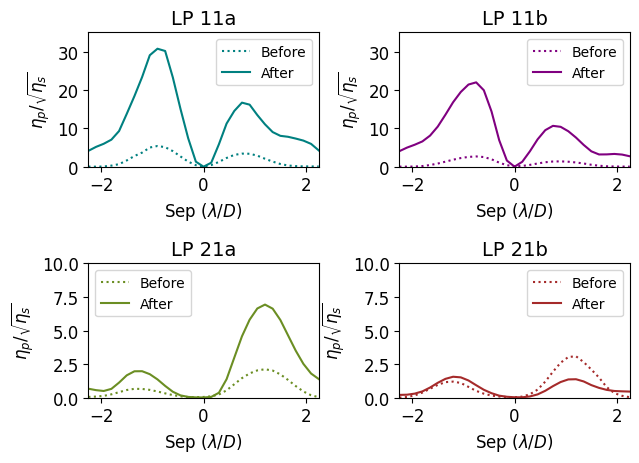

In [11]:
#eta_s/eta_p line profiles
x_xsec = np.linspace(x_min,x_max,31)
lp11a_pre_xsec = lp11a_pre[15,:]
lp11a_post_xsec = lp11a[15,:]
lp11b_pre_xsec = lp11b_pre[:,15]
lp11b_post_xsec = lp11b[:,15]

lp21a_pre_rot = ndimage.rotate(lp21a_pre,lp21a_rotangle,reshape=False)
lp21a_post_rot = ndimage.rotate(lp21a,lp21a_rotangle,reshape=False)
lp21a_pre_xsec = lp21a_pre_rot[15,:]
lp21a_post_xsec = lp21a_post_rot[15,:]

lp21b_pre_rot = ndimage.rotate(lp21b_pre,lp21b_rotangle,reshape=False)
lp21b_post_rot = ndimage.rotate(lp21b,lp21b_rotangle,reshape=False)
lp21b_pre_xsec = lp21b_pre_rot[15,:]
lp21b_post_xsec = lp21b_post_rot[15,:]

plt.figure()
plt.subplot(2,2,1)
plt.plot(x_xsec,lp11a_pre_xsec/np.sqrt(eta_s_pre[0]),':',color=linecolors[0],label='Before')
plt.plot(x_xsec,lp11a_post_xsec/np.sqrt(eta_s_post[0]),'-',color=linecolors[0],label='After')
plt.xlim([x_min,x_max])
plt.ylim([0,35])
plt.xlabel('Sep ($\lambda/D$)')
plt.ylabel('$\eta_p/\sqrt{\eta_s}$')
plt.title('LP 11a',fontsize=14)
plt.legend(fontsize=10)
plt.subplot(2,2,2)
plt.plot(x_xsec,lp11b_pre_xsec/np.sqrt(eta_s_pre[1]),':',color=linecolors[1],label='Before')
plt.plot(x_xsec,lp11b_post_xsec/np.sqrt(eta_s_post[1]),'-',color=linecolors[1],label='After')
plt.xlim([x_min,x_max])
plt.ylim([0,35])
plt.xlabel('Sep ($\lambda/D$)')
plt.ylabel('$\eta_p/\sqrt{\eta_s}$')
plt.title('LP 11b',fontsize=14)
plt.legend(fontsize=10)
plt.subplot(2,2,3)
plt.plot(x_xsec,lp21a_pre_xsec/np.sqrt(eta_s_pre[2]),':',color=linecolors[2],label='Before')
plt.plot(x_xsec,lp21a_post_xsec/np.sqrt(eta_s_post[2]),'-',color=linecolors[2],label='After')
plt.xlim([x_min,x_max])
plt.ylim([0,10])
plt.xlabel('Sep ($\lambda/D$)')
plt.ylabel('$\eta_p/\sqrt{\eta_s}$')
plt.title('LP 21a',fontsize=14)
plt.legend(fontsize=10)
plt.subplot(2,2,4)
plt.plot(x_xsec,lp21b_pre_xsec/np.sqrt(eta_s_pre[3]),':',color=linecolors[3],label='Before')
plt.plot(x_xsec,lp21b_post_xsec/np.sqrt(eta_s_post[3]),'-',color=linecolors[3],label='After')
plt.xlim([x_min,x_max])
plt.ylim([0,10])
plt.xlabel('Sep ($\lambda/D$)')
plt.ylabel('$\eta_p/\sqrt{\eta_s}$')
plt.title('LP 21b',fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()

0.006418872228048265
7.421296551004057e-05
0.11027644345687125
0.000672972061699333


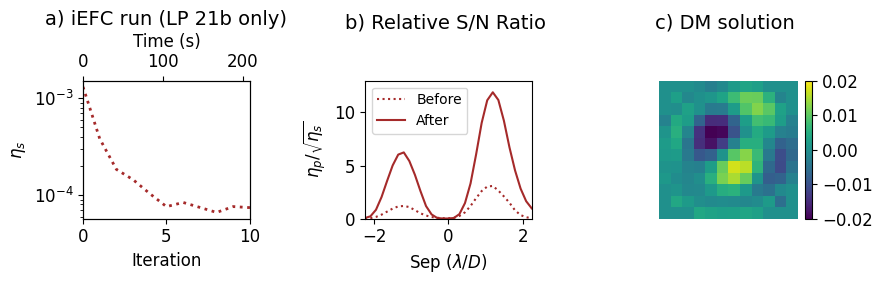

In [12]:
#LP 21b individual run

k_21b = range(11)
dir21b = 'data/lp21b_only/'
meas_21b = np.load(dir21b+'meas.npy')
meas_21b = meas_21b/meas_21b[0]*1.31e-3 #initial coupling value calibrated

pd_wide_21b = fits.getdata('data/lp21b_only/LP21b_post_iefc_30x30_NORMREDU.fits')
pd_wide_21b_rot = ndimage.rotate(pd_wide_21b,lp21b_rotangle,reshape=False)
pd_wide_21b_xsec = pd_wide_21b_rot[15,:]

dm_after_21b = np.load('data/lp21b_only/dm_hist.npy')[-1]
dm_diff_21b = dm_after_21b-dm_before

print(np.sqrt(np.mean(np.square(dm_diff_21b))))

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=[9,3])
plt.subplot(1,3,1)
plt.semilogy(k_21b,meas_21b[:,3],linestyle=linestyles[3],color=linecolors[3],linewidth=2)
plt.xlabel('Iteration')
plt.ylabel(r'$\eta_s$')
plt.xlim([0,10])
ax1 = plt.gca()
ax2 = ax1.twiny()
approx_timestamps_lp21b = np.arange(0,20.914562940597534*11,20.914562940597534) #dummy line
ax2.plot(approx_timestamps_lp21b,np.ones(approx_timestamps_lp21b.shape)*1e-3,linewidth=0)
plt.xlim([0,20.914562940597534*10])
plt.xlabel('Time (s)')
plt.title('a) iEFC run (LP 21b only)',fontsize=14)
plt.subplot(1,3,2)
# plt.imshow(pd_wide_21b,vmin=0,vmax=0.15)
# plt.colorbar(fraction=0.05)
# plt.axis('off')
plt.plot(x_xsec, lp21b_pre_xsec/np.sqrt(eta_s_pre[3]),':',color=linecolors[3],label='Before')
plt.plot(x_xsec, pd_wide_21b_xsec/np.sqrt(meas_21b[-1,3]),'-',color=linecolors[3],label='After')
plt.xlabel('Sep ($\lambda/D$)')
plt.ylabel('$\eta_p/\sqrt{\eta_s}$')
plt.xlim([x_min,x_max])
plt.ylim([0,13])
plt.title('b) Relative S/N Ratio \n \n',fontsize=14)
plt.legend(fontsize=10)
plt.subplot(1,3,3)
plt.imshow(dm_diff_21b,vmin=-0.02,vmax=0.02)
plt.colorbar(fraction=0.05)
plt.axis('off')
plt.title('c) DM solution \n \n',fontsize=14)
plt.tight_layout()

print(meas_21b[-1,3])
print(pd_wide_21b.max())
print(meas_21b[-1,3]/pd_wide_21b.max())